In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('churn.xlsx')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
1869/(5174+1869)

0.2653698707936959

<AxesSubplot:xlabel='Churn', ylabel='count'>

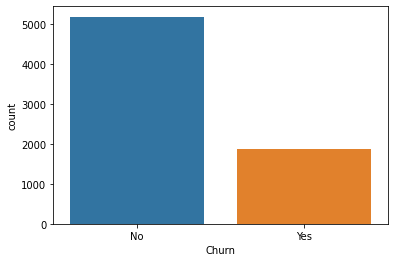

In [9]:
sns.countplot(df.Churn)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(7032, 21)

In [15]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015205,0.219556,0.102001
tenure,0.015205,1.000000,0.246852,0.825874
MonthlyCharges,0.219556,0.246852,1.000000,0.651065
TotalCharges,0.102001,0.825874,0.651065,1.000000


<AxesSubplot:>

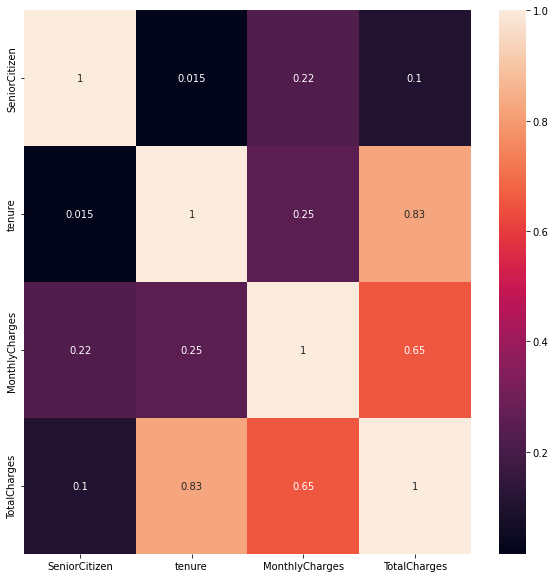

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

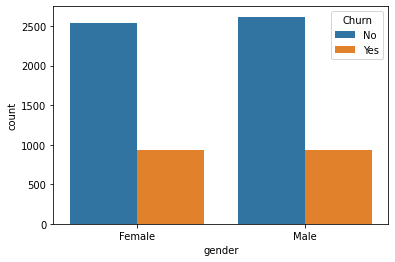

In [17]:
sns.countplot(x='gender',hue='Churn',data=df)

In [18]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

# Preprocess the dataset

In [19]:
df.drop('customerID',axis=1,inplace=True)

In [20]:
df.shape

(7032, 20)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype

In [25]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
x = df.drop('Churn',axis=1)

In [28]:
y= df[['Churn']]

In [29]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [30]:
x.shape

(7032, 19)

In [31]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [32]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [35]:
not_churned = (5163/(5163+1869))*100
churned = (1869/(5163+1869))*100

In [36]:
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not Churned 73.42150170648463 percent of total people
Churned 26.578498293515356 percent of total people


# Synthetic Minority Oversampling Technique(SMOTE)

In [38]:
!pip install imblearn

In [39]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=44)


In [40]:
y.value_counts() #before sampling

Churn
0        5163
1        1869
dtype: int64

In [41]:
X,Y = sm.fit_resample(x,y)

In [42]:
Y.value_counts()

Churn
0        4785
1        4785
dtype: int64

# Near Miss for under sampling

In [43]:
from imblearn.under_sampling import NearMiss

In [44]:
nm = NearMiss()
new_x, new_y  = nm.fit_resample(x,y)

In [45]:
new_y.value_counts()

Churn
0        1869
1        1869
dtype: int64

# Over Sampling

In [46]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
over = RandomOverSampler(random_state=44)

In [59]:
x_new, y_new = over.fit_resample(x,y)

In [60]:
y_new.value_counts()

Churn
0        5163
1        5163
dtype: int64

# Hold out cross validation

In [61]:
from sklearn.model_selection import train_test_split as tts

In [62]:
xtrain,xtest,ytrain,ytest = tts(x_new,y_new,random_state=42)

In [63]:
xtrain.to_csv('mominul.csv')

In [64]:
train,test = tts(df,train_size=.8,random_state=50)

In [65]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6403,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,0,116.60,8337.45,0
1677,1,0,1,1,6,1,2,2,1,1,1,1,1,1,2,0,3,25.40,153.30,0
2723,1,0,0,0,21,1,0,2,1,1,1,1,1,1,0,0,1,20.50,402.85,0
1192,1,0,0,0,7,1,2,1,0,0,2,0,2,0,0,1,2,90.45,593.45,1
3638,0,1,1,0,2,1,0,0,0,2,0,0,0,0,0,0,1,50.15,115.10,1


In [66]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4460,1,0,1,0,18,1,0,1,0,0,2,2,0,0,0,0,2,78.20,1468.75,0
733,0,0,1,1,72,1,2,1,2,0,0,0,0,0,2,0,0,79.05,5730.70,0
5514,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,1,0,48.45,48.45,0
5864,0,0,1,0,47,1,0,2,1,1,1,1,1,1,2,0,0,19.65,921.55,0
916,0,1,0,0,23,1,0,1,2,0,0,0,0,0,0,1,0,75.40,1643.55,0


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [68]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
dt.score(xtest,ytest)

0.8609604957397367

# Without Sampling

In [70]:
x.shape

(7032, 19)

In [71]:
xtrain1,xtest1,ytrain1,ytest1 = tts(x,y,test_size=.3,random_state=42)

In [72]:
dt.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [73]:
dt.score(xtest1,ytest1)

0.7208530805687203

# K Fold Cross Validation

In [74]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [75]:
kfold = KFold(n_splits=4)

In [76]:
result = cross_val_score(dt,x_new,y_new,cv=kfold)

In [77]:
result

array([0.81177382, 0.80015492, 0.86904301, 0.99612553])

In [78]:
result.mean()

0.8692743191846752

In [79]:
result.max()

0.9961255327392483

In [80]:
result.min()

0.8001549186676995

# Stratified K Fold Cross Validation

In [81]:
from sklearn.model_selection import StratifiedKFold

In [83]:
st = StratifiedKFold(n_splits=4)

In [84]:
score2 = cross_val_score(dt,x_new,y_new,cv=st)

In [85]:
score2

array([0.85670023, 0.85631294, 0.88260364, 0.90236343])

In [86]:
score2.mean()

0.8744950587787594

# Leave one out cross validation

In [87]:
from sklearn.model_selection import LeaveOneOut

In [88]:
le = LeaveOneOut()

In [ ]:
result3 = cross_val_score(dt,x_new,y_new,cv=le)

In [ ]:
result.mean()